In [1]:
import requests
import pandas as pd

In [2]:
start='2022-03-02'
to='2022-04-01'
myurl='https://transparency.entsog.eu/api/v1/aggregateddata.xlsx?forceDownload=true&pointDirection=fr----------fr-tso-0003exittransmissionbe-lux------,fr----------fr-tso-0003entrytransmissionbe-lux------,fr----------fr-tso-0002exitstorage,fr----------fr-tso-0003exitstorage,fr----------fr-tso-0003entrytransmission%7Ctransmissionde-the-----,fr----------fr-tso-0003entrytransmission,fr----------fr-tso-0003exittransmissionch---------,fr----------fr-tso-0002entrytransmissiones---------,fr----------fr-tso-0003entrytransmissionch---------,fr----------fr-tso-0002exittransmissiones---------,fr----------fr-tso-0003exitlng%20terminals,fr----------fr-tso-0003exitdistribution,fr----------fr-tso-0003entrystorage,fr----------fr-tso-0003exittransmissionbe-l-zone--,fr----------fr-tso-0002exitfinal%20consumers,fr----------fr-tso-0003entrytransmissionbe-l-zone--,fr----------fr-tso-0002entrystorage,fr----------fr-tso-0002exitdistribution,fr----------fr-tso-0003entrylng%20terminals,fr----------fr-tso-0003exitfinal%20consumers&from={}&to={}&indicator=Physical%20Flow&periodType=day&timezone=CET&limit=-1'.format(start,to)
response=requests.get(myurl)
print(response)

<Response [200]>


In [3]:
df=pd.read_excel(myurl)
print(df)

                                                    id  dataSet dataSetLabel  \
0    1AggregatesFRFR----------FR-TSO-0002entryStora...        1   Aggregates   
1    1AggregatesFRFR----------FR-TSO-0002entryTrans...        1   Aggregates   
2    1AggregatesFRFR----------FR-TSO-0002exitDistri...        1   Aggregates   
3    1AggregatesFRFR----------FR-TSO-0002exitFinal ...        1   Aggregates   
4    1AggregatesFRFR----------FR-TSO-0002exitStorag...        1   Aggregates   
..                                                 ...      ...          ...   
507  1AggregatesFRFR----------FR-TSO-0003exitFinal ...        1   Aggregates   
508  1AggregatesFRFR----------FR-TSO-0003exitLNG Te...        1   Aggregates   
509  1AggregatesFRFR----------FR-TSO-0003exitStorag...        1   Aggregates   
510  1AggregatesFRFR----------FR-TSO-0003exitTransm...        1   Aggregates   
511  1AggregatesFRFR----------FR-TSO-0003exitTransm...        1   Aggregates   

         indicator periodType        pe

In [4]:
df_subset=df[['directionKey','day','value']]
print(df_subset)

    directionKey  day         value
0          entry    2  2.072255e+08
1          entry    2  8.890567e+07
2           exit    2  9.038888e+07
3           exit    2  1.395527e+07
4           exit    2  7.395757e+07
..           ...  ...           ...
507         exit    1  1.313801e+09
508         exit    1           NaN
509         exit    1  1.288267e+07
510         exit    1  2.587680e+08
511         exit    1  2.571187e+08

[512 rows x 3 columns]


In [5]:
values_by_entry=df_subset.pivot_table(index=['day','directionKey'])
print(values_by_entry)

                         value
day directionKey              
1   entry         3.835046e+08
    exit          3.098583e+08
2   entry         3.283613e+08
    exit          2.950700e+08
3   entry         3.081736e+08
...                        ...
29  exit          2.122098e+08
30  entry         2.898743e+08
    exit          2.278800e+08
31  entry         3.264903e+08
    exit          2.681375e+08

[62 rows x 1 columns]


<AxesSubplot:xlabel='day,directionKey'>

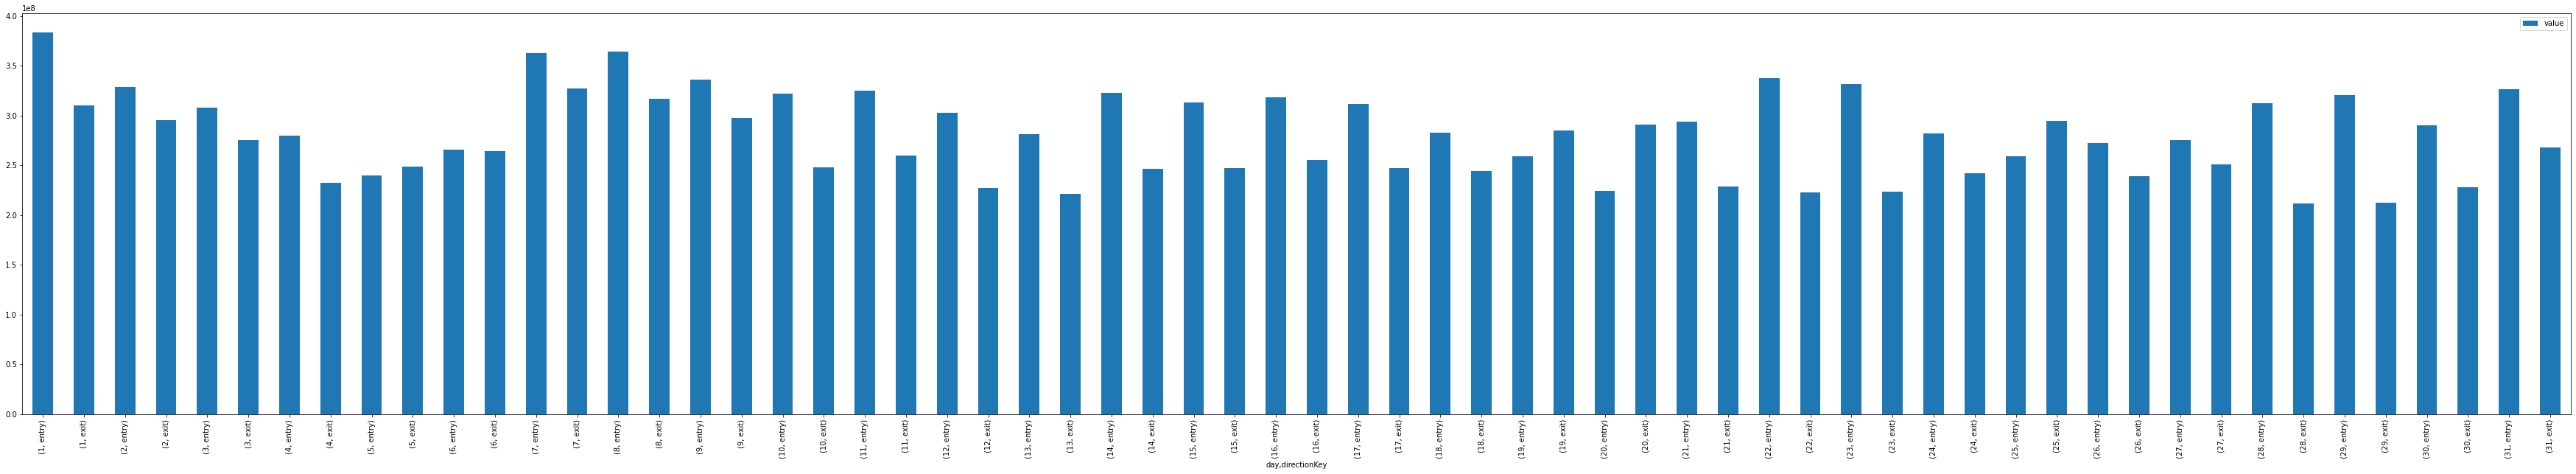

In [6]:
values_by_entry.plot(kind='bar',figsize=(62,10))